<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data=pd.read_csv('90types.csv')
# data=pd.read_csv('https://fashion.s3.us-east-2.amazonaws.com/90types.csv')

In [1]:
# BUILDING FIRST HALF OF RANDOMM OVERSAMPLING (already uploaded as data1.csv)
data1=data[data['type']<50]

X=data1.drop(['filename', 'type_desc','ID'], axis=1)
y=data1[['type']]

smote = SMOTE(sampling_strategy='auto')
X1, y1 = smote.fit_resample(X, y)

A1=X1.sort_values(by=['type'])
A1=A1.reset_index().drop(['index'],axis=1)

denom=(X1['type'].value_counts().values[0])

A1['run1']=A1.index+1
A1['run2']=np.where(A1['run1']==1,1,\
           np.where(A1['run1']%denom==0,denom,A1['run1']%denom))

print('balanced dataset \n', A1['type'][A1['run2']<=4000].value_counts())
A1.drop(['run1','run2'],axis=1)[A1['run2']<=4000].to_csv('data1.csv', index=False)

In [ ]:
#BUILDING SECOND HALF OF ROS (ALSO ALREADY UPLOADED as data2.csv as below) 
data2=data[data['type']>=50]

X=data2.drop(['filename', 'type_desc','ID'], axis=1)
y=data2[['type']]

smote = SMOTE(sampling_strategy='auto')
X2, y2 = smote.fit_resample(X, y)

A2=X2.sort_values(by=['type'])
A2=A2.reset_index().drop(['index'],axis=1)

denom=(X2['type'].value_counts().values[0])

A2['run1']=A2.index+1
A2['run2']=np.where(A2['run1']==1,1,\
           np.where(A2['run1']%denom==0,denom,A2['run1']%denom))

# print('balanced dataset\n', A2['type'][A2['run2']<=4000].value_counts())
A2.drop(['run1','run2'],axis=1)[A2['run2']<=4000].to_csv('data2.csv', index=False)

In [4]:
#USE PREVIOUSLY RUN data1.csv and data2.csv in case above codes takes too long
data1=pd.read_csv('https://fashion.s3.us-east-2.amazonaws.com/data1.csv')
data2=pd.read_csv('https://fashion.s3.us-east-2.amazonaws.com/data2.csv')

datas=pd.concat([data1,data2])
X = datas.drop(['type'], axis=1)
y = datas['type']
X_train, X_test, y_train, y_test = train_test_split(\
    X, y, test_size=0.33, random_state=42)
# Training the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Assessing the model
lr.score(X_test, y_test)

0.6326430976430977

In [11]:
### TESTING

item = 50002

new_search=pd.DataFrame(lr.predict_proba(np.expand_dims(np.array(X.iloc[item]), axis=0)).T).rename(columns={0:'ai_confidence'})

master = pd.DataFrame(
    {'id':  [i for i in range(90)],
     'type': [           'Backpacks',   'Clutch bags', 'Duffel Bags', 'Handbags',   'Laptop Bag',  'Messenger Bags','Rucksacks',  'Waistpacks',  'Belts',       'Cufflinks',   'Face Masks',  'Gloves',      'Mufflers',    'Ties',        'Wallets',     'Watches',     'Wristbands',  'Caps',        'Hats',        'Headbands',   'Bracelets',   'Earrings',    'Glasses',     'Sunglasses',  'Necklaces',   'Rings',       'Perfumes',    'Capris',      'Jeans',      'Jeggings',   'Joggers',    'Leggings',   'Patiala',    'Scarves',    'Shorts',     'Skirts',     'Tights ',    'Trousers',   'Cardigans', 'Hoodies', 'Shirts',  'Sweaters', 'Sweatshirts', 'TankTops', 'Tops',    'Tshirt',  'Tunics',  'Above Knee', 'Ballerina', 'Bikini',   'Blazers',   'Boots',    'Boxers',    'Bralettes', 'Bras',      'Briefs',    'Camisoles', 'Coats',     'Cover ups', 'Flip Flops', 'Formal Shoes', 'Formal suits', 'Heels',    'Innerware Vests', 'Jackets',   'Jumpsuit', 'Knee Length', 'Lounge Pants',     'Lounge Shorts',    'Lounge Wear',      'Maxi',    'Midi',    'Mini',    'Night Dress',      'One Piece', 'Panties',   'Robes',            'Rompers', 'Sandals',  'Socks',     'Shapewear', 'Sleepwear',        'Slides',   'Sneakers ', 'Sport Bras', 'Swim Shorts', 'Tracksuits', 'Undershirt', 'Vest',      'Loafers', ],
     'sub_category': [   'Bags',        'Bags',        'Bags',        'Bags',       'Bags',        'Bags',          'Bags',       'Bags',        'Acessories',  'Acessories',  'Acessories',  'Acessories',  'Acessories',  'Acessories',  'Acessories',  'Acessories',  'Acessories',  'Headwear',    'Headwear',    'Headwear',    'Jewellery',   'Jewellery',   'Eyewear',     'Eyewear',     'Jewellery',   'Jewellery',   'Fragrance',   'Bottomwear',  'Bottomwear', 'Bottomwear', 'Bottomwear', 'Bottomwear', 'Bottomwear', 'Bottomwear', 'Bottomwear', 'Bottomwear', 'Bottomwear', 'Bottomwear', 'Topwear',   'Topwear', 'Topwear', 'Topwear',  'Topwear',     'Topwear',  'Topwear', 'Topwear', 'Topwear', 'Dresses',    'Shoes',     'Swimwear', 'Outerwear', 'Shoes',    'Innerwear', 'Innerwear', 'Innerwear', 'Innerwear', 'Innerwear', 'Outerwear', 'Swimwear',  'Sandals',    'Shoes',        'Suits',        'Shoes',    'Innerwear',       'Outerwear', 'Suits',    'Dresses',     'Lounge/Nightwear', 'Lounge/Nightwear', 'Lounge/Nightwear', 'Dresses', 'Dresses', 'Dresses', 'Lounge/Nightwear', 'Swimwear',  'Innerwear', 'Lounge/Nightwear', 'Suits',   'Sandals',  'Innerwear', 'Innerwear', 'Lounge/Nightwear', 'Sandals',  'Shoes',     'Innerwear',  'Swimwear',    'Suits',      'Innerwear',  'Outerwear', 'Shoes', ],
     'master_category': ['Accessories', 'Accessories', 'Accessories', 'Accessories','Accessories', 'Accessories',   'Accessories','Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Accessories', 'Apparel',     'Apparel',    'Apparel',    'Apparel',    'Apparel',    'Apparel',    'Apparel',    'Apparel',    'Apparel',    'Apparel',    'Apparel',    'Apparel',   'Apparel', 'Apparel', 'Apparel',  'Apparel',     'Apparel',  'Apparel', 'Apparel', 'Apparel', 'Apparel',    'Footwear',  'Apparel',  'Apparel',   'Footwear', 'Apparel',   'Apparel',   'Apparel',   'Apparel',   'Apparel',   'Apparel',   'Apparel',   'Footwear',   'Footwear',     'Apparel',      'Footwear', 'Apparel',         'Apparel',   'Apparel',  'Apparel',     'Apparel',          'Apparel',          'Apparel',          'Apparel', 'Apparel', 'Apparel', 'Apparel',          'Apparel',   'Apparel',   'Apparel',          'Apparel', 'Footwear', 'Apparel',   'Apparel',   'Apparel',          'Footwear', 'Footwear',  'Apparel',    'Apparel',     'Apparel',    'Apparel',    'Apparel',   'Footwear', ],
     }, columns = ['id','type', 'sub_category', 'master_category'])
master.join(new_search).sort_values(by='ai_confidence', ascending=False).head(10)


,id,type,sub_category,master_category,ai_confidence
12,12,Mufflers,Acessories,Accessories,0.903633
33,33,Scarves,Bottomwear,Apparel,0.034152
68,68,Lounge Shorts,Lounge/Nightwear,Apparel,0.013991
31,31,Leggings,Bottomwear,Apparel,0.008169
46,46,Tunics,Topwear,Apparel,0.007031
30,30,Joggers,Bottomwear,Apparel,0.004555
82,82,Slides,Sandals,Footwear,0.003543
53,53,Bralettes,Innerwear,Apparel,0.002530
64,64,Jackets,Outerwear,Apparel,0.001744
75,75,Panties,Innerwear,Apparel,0.001712


In [ ]:
# TRUTH VALUES
print(master['type'][y.iloc[item]])
print(master['sub_category'][y.iloc[item]])
print(master['master_category'][y.iloc[item]])

Mufflers
Acessories
Accessories


  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   8  42  71  21   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0  51 156 189 201 154  43   3   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0  51 173 197 186 192 187 172  57   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   8 140 190 195 191 190 186 195 165  15   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   8 157 185 194 154 167 194 187 187  41   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   8 161 191 168  45  72 198 188 179  37   0   0   0   0 

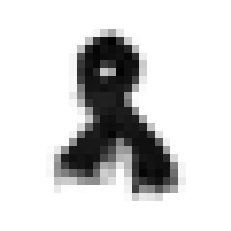

In [ ]:
#VISUALIZATION
for i in range(28):
    for j in list(np.array(X.iloc[item]).reshape(28,28)[i]):
      print('  '[:3-len(str(j))]+str(j), end=' ')
    print('\n')
    
# grayscale image    
import matplotlib.pyplot as plt
plt.imshow(np.array(X.iloc[item]).reshape(28,28), cmap='gray_r')
plt.axis('off');